In [49]:
library(caTools)
census = read.csv("census.csv")
set.seed(2000)
spl = sample.split(census$over50k, SplitRatio = 0.6)
train = subset(census, spl==TRUE)
test = subset(census, spl==FALSE)

In [2]:
summary(train)

      age                    workclass             education   
 Min.   :17.00    Private         :12017    HS-grad     :5553  
 1st Qu.:28.00    Self-emp-not-inc: 1307    Some-college:3857  
 Median :37.00    Local-gov       : 1110    Bachelors   :2858  
 Mean   :38.58    ?               : 1001    Masters     : 908  
 3rd Qu.:48.00    State-gov       :  701    Assoc-voc   : 762  
 Max.   :90.00    Self-emp-inc    :  584    11th        : 638  
                 (Other)          :  498   (Other)      :2642  
                maritalstatus             occupation            relationship 
  Divorced             :2374    Exec-managerial:2177    Husband       :6969  
  Married-AF-spouse    :  15    Prof-specialty :2171    Not-in-family :4383  
  Married-civ-spouse   :7903    Craft-repair   :2144    Other-relative: 515  
  Married-spouse-absent: 223    Adm-clerical   :1975    Own-child     :2695  
  Never-married        :5609    Sales          :1939    Unmarried     :1830  
  Separated         

In [3]:
logit = glm(over50k ~ ., data = train, family=binomial)
summary(logit)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = over50k ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2341  -0.5045  -0.1821  -0.0004   3.4323  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -7.664e+00  1.113e+00  -6.887 5.71e-12
age                                       2.441e-02  2.280e-03  10.708  < 2e-16
workclass Federal-gov                     1.146e+00  2.124e-01   5.397 6.80e-08
workclass Local-gov                       5.010e-01  1.925e-01   2.603 0.009239
workclass Never-worked                   -1.045e+01  1.142e+03  -0.009 0.992699
workclass Private                         7.582e-01  1.712e-01   4.428 9.51e-06
workclass Self-emp-inc                    9.394e-01  2.051e-01   4.580 4.64e-06
workclass Self-emp-not-inc                4.050e-01  1.881e-01   2.153 0.031304
workclass State-gov                       3

In [4]:
predictLogit = predict(logit, type="response", newdata = test)
table(predictLogit > 0.5, test$over50k)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

       
         <=50K  >50K
  FALSE  10421  1439
  TRUE     777  2123

In [5]:
(10421 + 2123) / nrow(test)

[1] 0.8498645

In [6]:
table(test$over50k)


 <=50K   >50K 
 11198   3562 

In [7]:
11198 / nrow(test)

[1] 0.7586721

In [8]:
library(ROCR)
ROCRResult = prediction(predictLogit, test$over50k)
as.numeric(performance(ROCRResult, "auc")@y.values)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[1] 0.9049434

In [9]:
library(rpart)
library(rpart.plot)

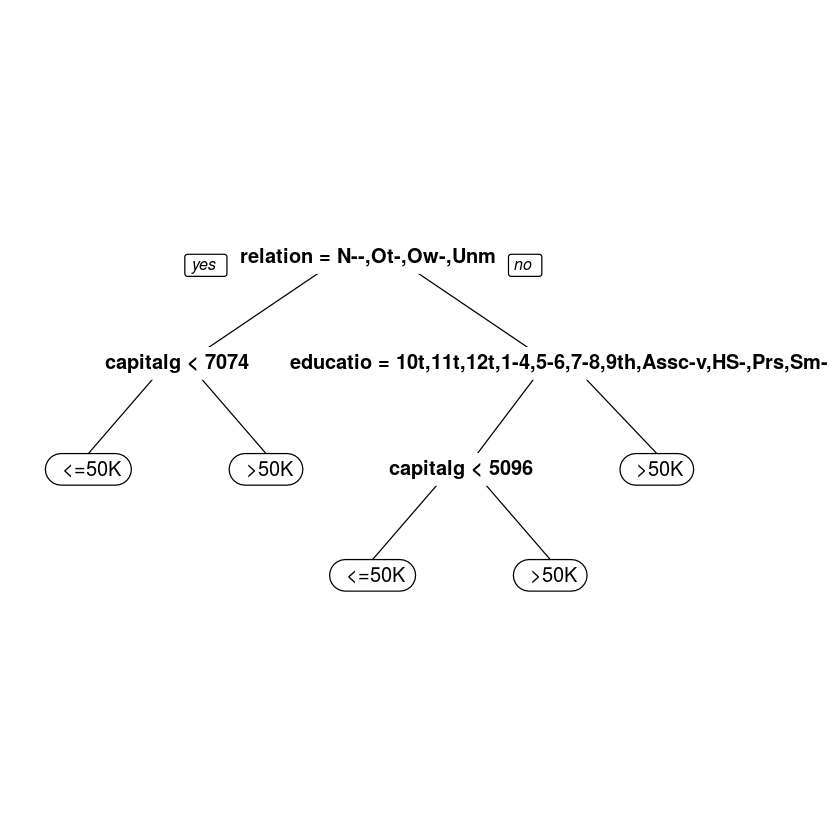

In [10]:
CART = rpart(over50k ~ ., data = train, method="class")
prp(CART)

In [11]:
PredictCART = predict(CART, newdata = test, type = "class")
table(PredictCART, test$over50k)

           
PredictCART  <=50K  >50K
      <=50K  10531  1672
      >50K     667  1890

In [12]:
(10531 + 1890) / nrow(test)

[1] 0.8415312

In [13]:
PredictCART = predict(CART, newdata = test)[,2]

In [14]:
as.numeric(performance(prediction(PredictCART, test$over50k),"auc")@y.values)

[1] 0.842169

In [15]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [16]:
set.seed(1)
trainSmall = train[sample(nrow(train), 2000), ]
set.seed(1)
ForestModel = randomForest(over50k ~ ., data = trainSmall)

In [17]:
PredictForest = predict(ForestModel, newdata = test)

In [18]:
table(PredictForest, test$over50k)

             
PredictForest  <=50K  >50K
        <=50K  10260  1306
        >50K     938  2256

In [19]:
(10260 + 2256) / nrow(test)

[1] 0.8479675

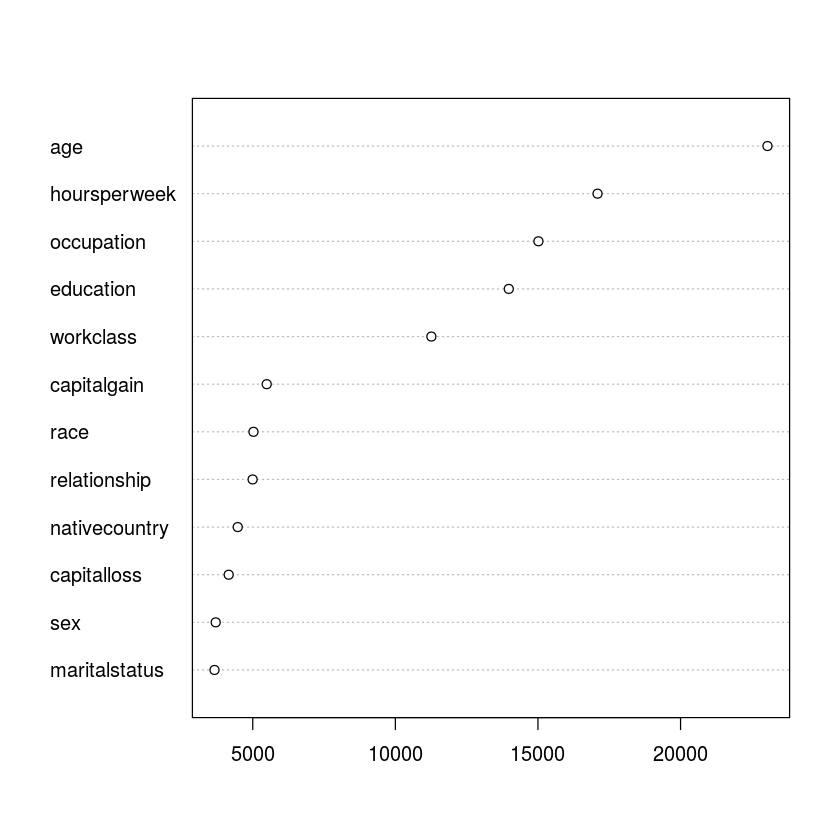

In [20]:
vu = varUsed(ForestModel, count=TRUE)

vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)

dotchart(vusorted$x, names(ForestModel$forest$xlevels[vusorted$ix]))

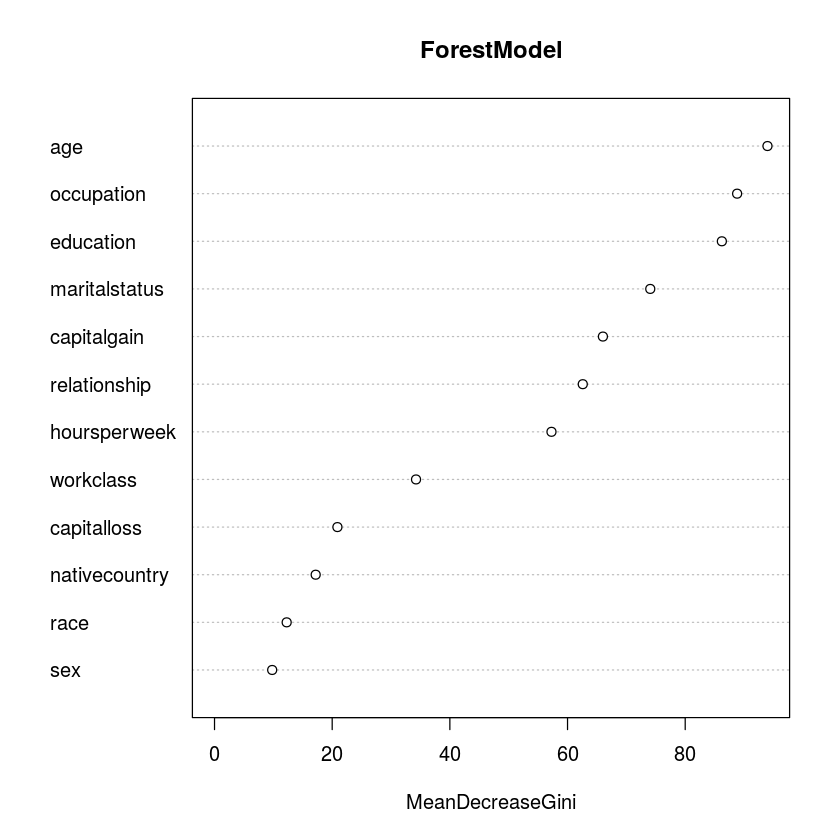

In [21]:
varImpPlot(ForestModel)

In [22]:
library(caret)
library(e1071)
set.seed(2)
numFolds = trainControl( method = "cv", number = 10 )
cpGrid = expand.grid( .cp = seq(0.002,0.1,0.002)) 
train(over50k ~ ., data = train, method = "rpart", trControl = numFolds, tuneGrid = cpGrid )

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin

Warning message:
“replacing previous import by ‘plyr::ddply’ when loading ‘caret’”Warning message:
“replacing previous import by ‘tibble::as_tibble’ when loading ‘broom’”Warning message:
“replacing previous import by ‘tibble::tibble’ when loading ‘broom’”Warning message:
“replacing previous import by ‘rlang::!!’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::expr’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::f_lhs’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::f_rhs’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::invoke’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::is_empty’ when loading ‘recipes’”Warning message:
“replacing previous import by ‘rlang::lang’ wh

CART 

17218 samples
   12 predictors
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 15496, 15496, 15495, 15497, 15496, 15495, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.002  0.8563712  0.5751312
  0.004  0.8535257  0.5651777
  0.006  0.8494610  0.5452342
  0.008  0.8496353  0.5442658
  0.010  0.8478345  0.5426092
  0.012  0.8466732  0.5407577
  0.014  0.8466152  0.5407737
  0.016  0.8466152  0.5407737
  0.018  0.8466152  0.5407737
  0.020  0.8441764  0.5274339
  0.022  0.8433049  0.5199841
  0.024  0.8433049  0.5199841
  0.026  0.8433049  0.5199841
  0.028  0.8433049  0.5199841
  0.030  0.8433049  0.5199841
  0.032  0.8433049  0.5199841
  0.034  0.8433049  0.5199841
  0.036  0.8433049  0.5199841
  0.038  0.8433049  0.5199841
  0.040  0.8392987  0.5046338
  0.042  0.8297742  0.4627558
  0.044  0.8268707  0.4465884
  0.046  0.8262315  0.4427755
  0.048  0.8236749  0.4306578
  

In [50]:
set.seed(2)
bestCART = rpart(over50k ~ . , data = train, method="class", cp = .002)
table(predict(bestCART, newdata = test, type = "class"), test$over50k)

        
          <=50K  >50K
   <=50K   9178  1240
   >50K     535  1838

In [26]:
(10515 + 2116) / nrow(test)

[1] 0.8557588

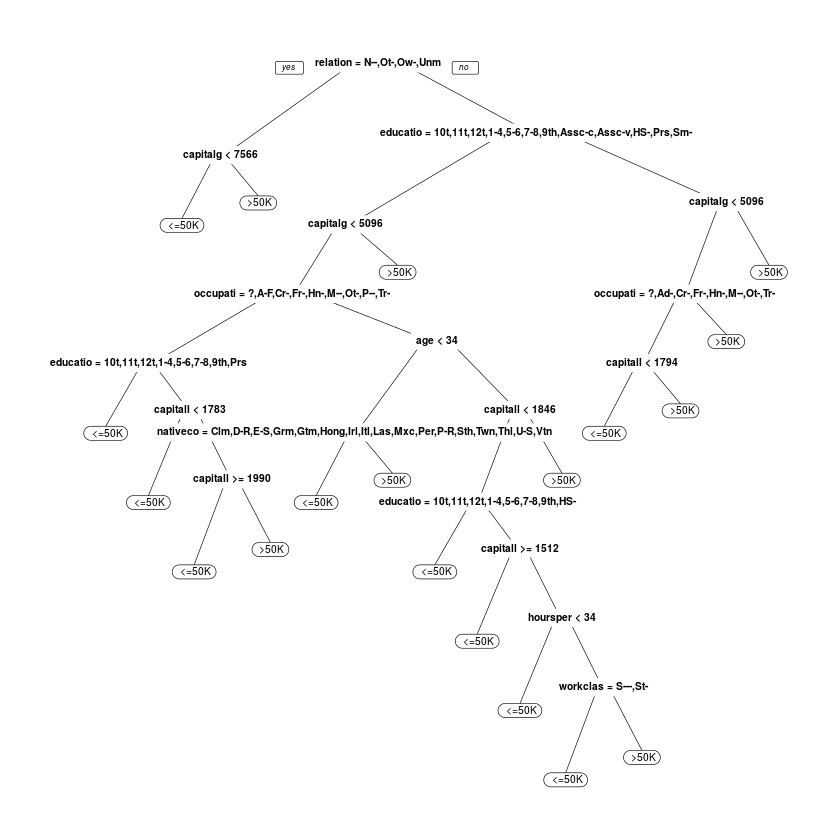

In [51]:
prp(bestCART)

In [44]:
9178+535+1240+1838

[1] 12791

In [45]:
nrow(test)

[1] 14760

In [47]:
14760 / 12791

[1] 1.153936